<font size="5"> ASTR 403 - Project/Exam 1 </font> <br>
<b> Author:</b> Payton Clem

In [17]:
from helper_functions import *
import matplotlib.pyplot as plt
import numpy as np
import corner
import emcee
from scipy.optimize import minimize
from astropy.cosmology import FlatLambdaCDM, LambdaCDM # the distance_modulus equation that will be used

In [18]:
# Getting and sorting the data
data = get_data('data.txt')
zcmb = data[0]  # redshift
mb = data[1]  # observed B-band magnitude
dmb = data[2]  # error of the observed B-band magnitude

<font size="5"> <b> NUMBER 1: </b> </font>

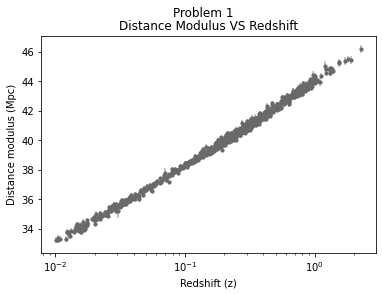

In [19]:
distance_modulus = []
Mb = -19.3
for i in range(len(mb)):
    distance_modulus.append(get_distance_modulus(mb[i], Mb))


plt.scatter(zcmb, distance_modulus, label='Hubble', color='dimgray', marker='.', zorder=1)
plt.errorbar(zcmb, distance_modulus, xerr=None, yerr=dmb, fmt='.', ecolor='dimgray', color='dimgray', alpha=0.5)
plt.xscale('log')
plt.title('Distance Modulus VS Redshift')
plt.suptitle('Problem 1')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance modulus (Mpc)')
plt.savefig('Problem 1.png')
plt.show()

<font size="5"> <b> NUMBER 2: </b> </font>

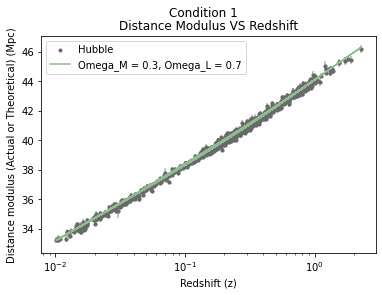

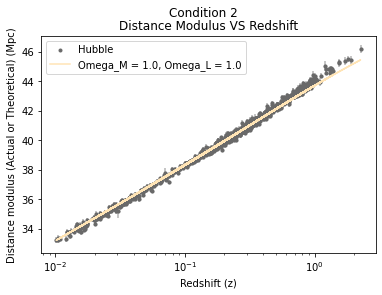

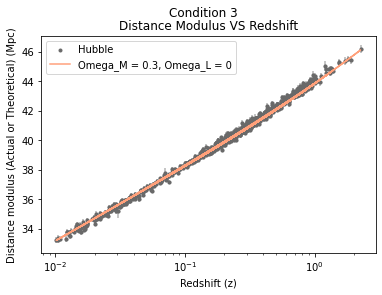

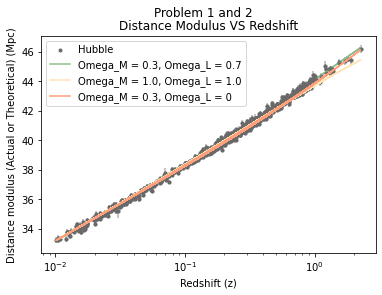

In [20]:
# Cosmological parameter set 1:
# Finding the distance modulus using the FlatLambdaCDM function from Astropy
cosmo = FlatLambdaCDM(70, 0.3) # CDM model 
LCDM_1 = cosmo.distmod(zcmb).value # findes distance modulus based off of out CDM model


plt.scatter(zcmb, distance_modulus, label='Hubble', color='dimgray', marker='.', zorder=1)
plt.errorbar(zcmb, distance_modulus, xerr=None, yerr=dmb, fmt='.', ecolor='dimgray', color='dimgray', alpha=0.5)

plt.plot(zcmb, LCDM_1, label='Omega_M = 0.3, Omega_L = 0.7', color='darkseagreen', zorder=3)

plt.xscale('log')
plt.legend()
plt.title('Distance Modulus VS Redshift')
plt.suptitle('Condition 1')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance modulus (Actual or Theoretical) (Mpc)')
plt.savefig('Problem 2_Condition 1.png')
plt.show()

# Cosmological parameter set 2:
# Finding the distance modulus using the FlatLambdaCDM function from Astropy
cosmo = LambdaCDM(70, 1.0, 1.0) # CDM model 
LCDM_2 = cosmo.distmod(zcmb).value # findes distance modulus based off of out CDM model


plt.scatter(zcmb, distance_modulus, label='Hubble', color='dimgray', marker='.', zorder=1)
plt.errorbar(zcmb, distance_modulus, xerr=None, yerr=dmb, fmt='.', ecolor='dimgray', color='dimgray', alpha=0.5)

plt.plot(zcmb, LCDM_2, label='Omega_M = 1.0, Omega_L = 1.0', color='moccasin', zorder=3)

plt.xscale('log')
plt.legend()
plt.title('Distance Modulus VS Redshift')
plt.suptitle('Condition 2')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance modulus (Actual or Theoretical) (Mpc)')
plt.savefig('Problem 2_Condition 2.png')
plt.show()

# Cosmological parameter set 3:
# Finding the distance modulus using the FlatLambdaCDM function from Astropy
cosmo = LambdaCDM(70, 0.3, 0) # CDM model 
LCDM_3 = cosmo.distmod(zcmb).value # findes distance modulus based off of out CDM model

plt.scatter(zcmb, distance_modulus, label='Hubble', color='dimgray', marker='.', zorder=1)
plt.errorbar(zcmb, distance_modulus, xerr=None, yerr=dmb, fmt='.', ecolor='dimgray', color='dimgray', alpha=0.5)

plt.plot(zcmb, LCDM_3, label='Omega_M = 0.3, Omega_L = 0', color='lightsalmon', zorder=4)

plt.xscale('log')
plt.legend()
plt.title('Distance Modulus VS Redshift')
plt.suptitle('Condition 3')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance modulus (Actual or Theoretical) (Mpc)')
plt.savefig('Problem 2_Condition 3.png')
plt.show()


plt.scatter(zcmb, distance_modulus, label='Hubble', color='dimgray', marker='.', zorder=1)
plt.errorbar(zcmb, distance_modulus, xerr=None, yerr=dmb, fmt='.', ecolor='dimgray', color='dimgray', alpha=0.5)

plt.plot(zcmb, LCDM_1, label='Omega_M = 0.3, Omega_L = 0.7', color='darkseagreen', zorder=2)

plt.plot(zcmb, LCDM_2, label='Omega_M = 1.0, Omega_L = 1.0', color='moccasin', zorder=3)

plt.plot(zcmb, LCDM_3, label='Omega_M = 0.3, Omega_L = 0', color='lightsalmon', zorder=4)

plt.xscale('log')
plt.legend()
plt.title('Distance Modulus VS Redshift')
plt.suptitle('Problem 1 and 2')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance modulus (Actual or Theoretical) (Mpc)')
plt.savefig('Problem 2.png')
plt.show()

<font size="5"> <b> NUMBER 3: </b> </font>

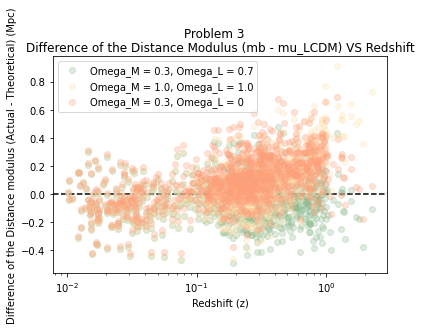

In [21]:
difference_1 = []
difference_2 = []
difference_3 = []
for i in range(len(mb)):
    difference_1.append(get_diff_distance_modulus(distance_modulus[i], LCDM_1[i]))
    difference_2.append(get_diff_distance_modulus(distance_modulus[i], LCDM_2[i]))
    difference_3.append(get_diff_distance_modulus(distance_modulus[i], LCDM_3[i]))

plt.scatter(zcmb, difference_1, label='Omega_M = 0.3, Omega_L = 0.7', alpha=0.3, color='darkseagreen', zorder=2)
plt.scatter(zcmb, difference_2, label='Omega_M = 1.0, Omega_L = 1.0', alpha=0.3, color='moccasin', zorder=3)
plt.scatter(zcmb, difference_3, label='Omega_M = 0.3, Omega_L = 0', alpha=0.3, color='lightsalmon', zorder=4)
plt.xscale('log')
plt.legend()
plt.title('Difference of the Distance Modulus (mb - mu_LCDM) VS Redshift')
plt.suptitle('Problem 3')
plt.xlabel('Redshift (z)')
plt.ylabel('Difference of the Distance modulus (Actual - Theoretical) (Mpc)')
plt.axhline(y=0, color='black', linestyle='dashed', zorder=1)
plt.savefig('Problem 3.png')
plt.show()

In [22]:
# ----------------- NUMBER 4 --------------------
# done in paper

# ----------------- NUMBER 5 --------------------
# done in paper

<font size="5"> <b> NUMBER 6: </b> Tutorial </font>
<br>
<br>
<font size="3"> For this part of the problem, the emcee tutorial (<a href="https://emcee.readthedocs.io/en/stable/tutorials/line/">emcee.readthedocs.io</a>) will be followed (and copied) just to verify that the code is functioning properly </font>


----------------- NUMBER 6 --------------------
-.-.-.-.-.-.-.-.- TUTORIAL-.-.-.-.-.-.-.-.-.-.-.


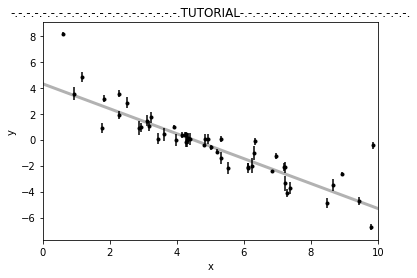

Least-squares estimates:
m = -1.104 ± 0.016
b = 5.441 ± 0.091


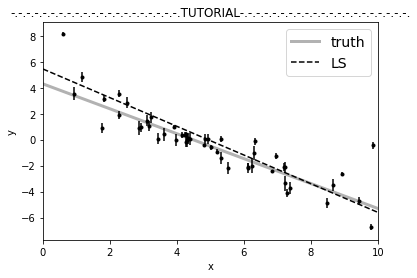

Maximum likelihood estimates:
m = -1.003
b = 4.528
f = 0.454


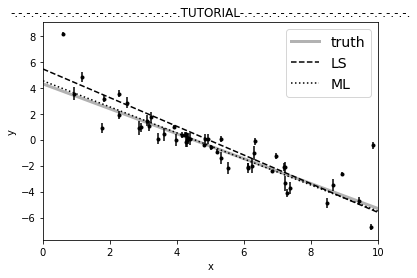

100%|██████████| 5000/5000 [00:08<00:00, 592.28it/s]


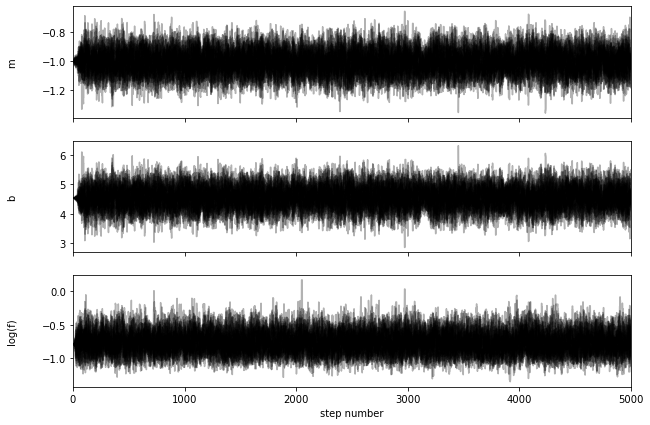

[39.99526726 39.76501919 41.02623912]
(10432, 3)


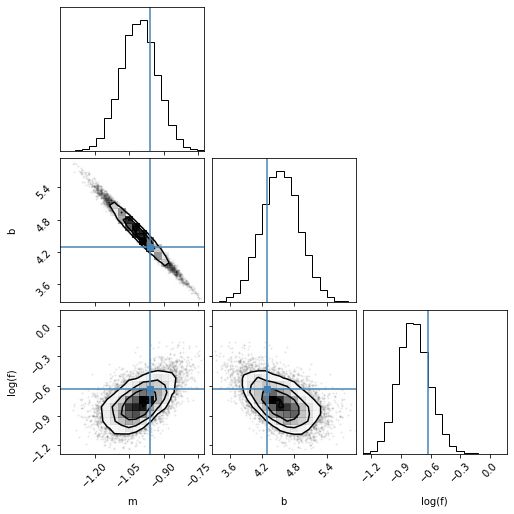

In [23]:
# -.-.-.-.-.-.-.-.- TUTORIAL-.-.-.-.-.-.-.-.-.-.-.

print('')
print('----------------- NUMBER 6 --------------------')
print('-.-.-.-.-.-.-.-.- TUTORIAL-.-.-.-.-.-.-.-.-.-.-.')
np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.TUTORIAL-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
plt.savefig('Tutorial 1.png')
plt.show()


A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr ** 2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr ** 2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.TUTORIAL-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
plt.savefig('Tutorial 2.png')
plt.show()



np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true, np.log(f_true)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.TUTORIAL-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
plt.savefig('Tutorial 3.png')
plt.show()

pos = soln.x + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(x, y, yerr)
)
sampler.run_mcmc(pos, 5000, progress=True)

fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")
plt.savefig('Tutorial 4.png')
plt.show()


tau = sampler.get_autocorr_time()
print(tau)

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

fig = corner.corner(
    flat_samples, labels=labels, truths=[m_true, b_true, np.log(f_true)]
)
plt.savefig('Tutorial 5.png')
plt.show()

<hr>

<font size="5"> <b> NUMBER 6: </b> Fit for model seen in <code>Emcee Fit</code> File </font>